In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"Mall_Customers.csv",index_col=0,header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
print(df.shape)
print(df.info())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


In [4]:
print(df.isnull().sum())
df.describe(include="all")

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [5]:
X=df.values[:,[2,3]]

In [6]:
X

array([[15, 39],
       [15, 81],
       [16, 6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18, 6],
       [18, 94],
       [19, 3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25, 5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87],
       [30, 4],
       [30, 73],
       [33, 4],
       [33, 92],
       [33, 14],
       [33, 81],
       [34, 17],
       [34, 73],
       [37, 26],
       [37, 75],
       [38, 35],
       [38, 92],
       [39, 36],
       [39, 61],
       [39, 28],
       [39, 65],
       [40, 55],
       [40, 47],
       [40, 42],
       [40, 42],
       [42, 52],
       [42, 60],
       [43, 54],
       [43, 60],
       [43, 45],
       [43, 41],
       [44, 50],
       [44, 46],
       [46, 51],
   

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


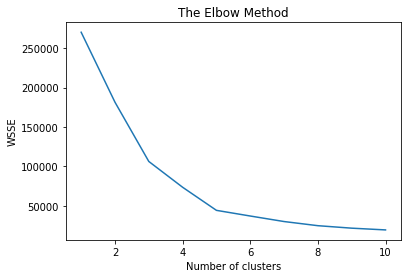

In [7]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()                     

In [8]:
print(wsse)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37271.88623658949, 30273.394312070042, 25022.48500453035, 21881.878507060963, 19669.710998301212]


In [9]:
#fitting K-Means to the dataset
kmeans=KMeans(n_clusters=5,random_state=10)
Y_pred=kmeans.fit_predict(X)

In [10]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [11]:
kmeans.inertia_

44448.4554479337

In [12]:
kmeans.n_iter_

5

In [13]:
df["Clusters"]=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


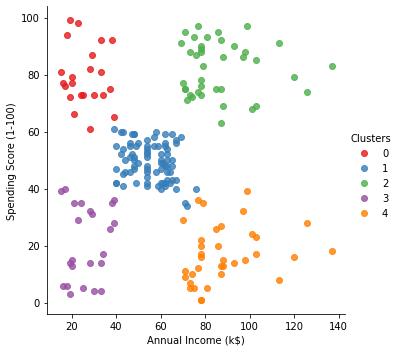

In [16]:
sns.lmplot( data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")   
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#       s = 300, c = 'black')
plt.show()

In [17]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [18]:
df["Clusters"]=df.Clusters.map({0:"Standard",1:"Target",2:"Sensible",3:"Careless",4:"Carefull"})

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Careless
2,Male,21,15,81,Standard
3,Female,20,16,6,Careless
4,Female,23,16,77,Standard
5,Female,31,17,40,Careless


In [20]:
new_df=df[df["Clusters"]=="Target"] #to identify no.of target clusters

In [21]:
new_df.shape

(81, 5)

In [22]:
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
44,Female,31,39,61,Target
47,Female,50,40,55,Target
48,Female,27,40,47,Target
49,Female,29,40,42,Target
50,Female,31,40,42,Target
...,...,...,...,...,...
122,Female,38,67,40,Target
123,Female,40,69,58,Target
127,Male,43,71,35,Target


In [23]:
new_df.to_excel(r"TargetCustomers.xlsx",index=True)